In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# Directory containing the CSV files
directory = 'results_dex'

# Initialize an empty list to store DataFrames
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Extract timepoint from filename
        timepoint = int(filename.split('_')[1][1])
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add the timepoint column
        df['timepoint'] = timepoint
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df)

        Unnamed: 0         gene_id      baseMean  log2FoldChange     lfcSE  \
0                1  NM_001243976.1   4245.686653        0.196113  0.026962   
1                2  NM_001243977.1  19021.783223       -0.235875  0.027394   
2                3  NM_001243978.1  20606.777055       -0.127580  0.020996   
3                4  NM_001243979.1  30428.954143       -0.068637  0.021033   
4                5  NM_001243980.1   2097.731384       -0.084298  0.038456   
...            ...             ...           ...             ...       ...   
443507       55435  XR_004772669.1    173.161224        0.450135  0.148567   
443508       55436  XR_004772670.1     67.072993        0.391419  0.233639   
443509       55437  XR_004772671.1      0.361662        0.000000  8.329115   
443510       55438  XR_004772672.1      0.501833        0.664868  4.254820   
443511       55439  XR_004772673.1     80.970112       -0.425892  0.237575   

            stat    pvalue  padj  timepoint  
0       7.273810 

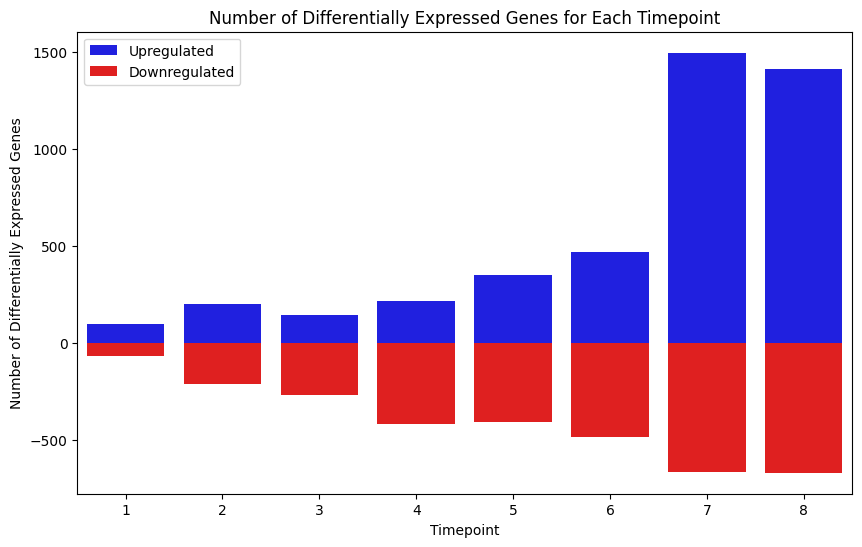

In [ ]:
# Filter the DataFrame for differentially expressed genes (e.g., padj < 0.05)
de_genes = combined_df[combined_df['padj'] < 0.05]

# Group by timepoint and count the number of differentially expressed genes
# Separate upregulated and downregulated genes
upregulated = de_genes[de_genes['log2FoldChange'] > 0]
downregulated = de_genes[de_genes['log2FoldChange'] < 0]

# Group by timepoint and count the number of upregulated and downregulated genes
upregulated_count = upregulated.groupby('timepoint').size()
downregulated_count = downregulated.groupby('timepoint').size()

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=upregulated_count.index, y=upregulated_count.values, color='blue', label='Upregulated')
sns.barplot(x=downregulated_count.index, y=-downregulated_count.values, color='red', label='Downregulated')
plt.xlabel('Timepoint')
plt.ylabel('Number of Differentially Expressed Transcripts')
plt.title('Differentially Expressed Transcripts for Each Timepoint')
plt.legend()
plt.show()

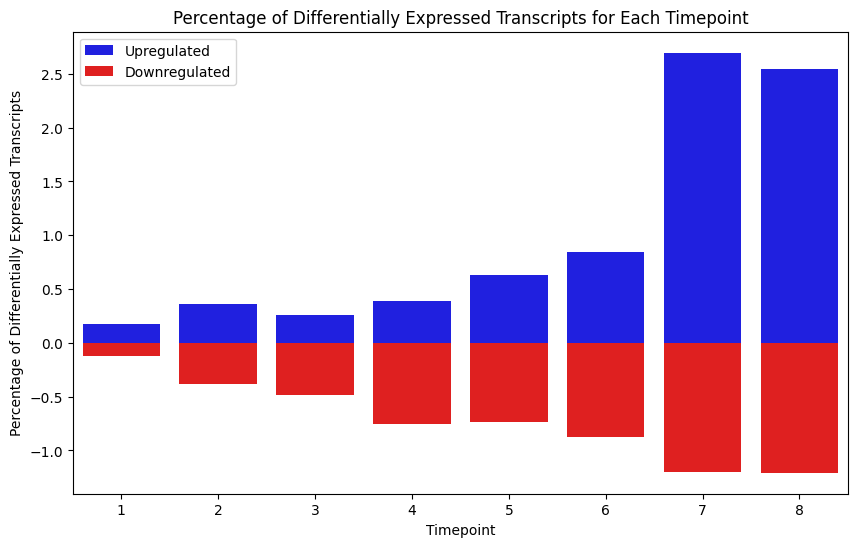

In [10]:
# Calculate the total number of genes for each timepoint
total_genes_per_timepoint = combined_df.groupby('timepoint').size()

# Calculate the percentage of upregulated and downregulated genes
upregulated_percentage = (upregulated_count / total_genes_per_timepoint) * 100
downregulated_percentage = (downregulated_count / total_genes_per_timepoint) * 100

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=upregulated_percentage.index, y=upregulated_percentage.values, color='blue', label='Upregulated')
sns.barplot(x=downregulated_percentage.index, y=-downregulated_percentage.values, color='red', label='Downregulated')
plt.xlabel('Timepoint')
plt.ylabel('Percentage of Differentially Expressed Transcripts')
plt.title('Percentage of Differentially Expressed Transcripts for Each Timepoint')
plt.legend()
plt.show()

In [9]:
# Initialize an empty list to store the results
diff_genes_between_timepoints = []

# Loop through each pair of consecutive timepoints
for i in range(1, 8):
    # Get the genes for the current and next timepoint
    genes_current = set(de_genes[de_genes['timepoint'] == i]['gene_id'])
    genes_next = set(de_genes[de_genes['timepoint'] == i + 1]['gene_id'])
    
    # Find the intersection of genes between the two timepoints
    shared_genes = genes_current.intersection(genes_next)
    
    # Append the result to the list
    diff_genes_between_timepoints.append({
        'Timepoint': f'{i} vs {i + 1}',
        'Number of Shared Genes': len(shared_genes)
    })

# Calculate the percentage of shared genes out of the total genes
for item in diff_genes_between_timepoints:
    item['Percentage of All Genes'] = (item['Number of Shared Genes'] / total_genes) * 100

# Convert the list to a DataFrame
diff_genes_table = pd.DataFrame(diff_genes_between_timepoints)

print(diff_genes_table)


  Timepoint  Number of Shared Genes  Percentage of All Genes
0    1 vs 2                      41                 0.073955
1    2 vs 3                     110                 0.198416
2    3 vs 4                     173                 0.312055
3    4 vs 5                     285                 0.514079
4    5 vs 6                     398                 0.717906
5    6 vs 7                     487                 0.878443
6    7 vs 8                    1290                 2.326882


In [8]:
unique_de_genes = de_genes['gene_id'].nunique()
print(f'There are {unique_de_genes} unique differentially expressed genes among all timepoints.')

total_genes = combined_df['gene_id'].nunique()
percentage_de_genes = (unique_de_genes / total_genes) * 100
print(f'This represents {percentage_de_genes:.2f}% of all transcripts in the dataset.')

There are 4129 unique differentially expressed genes among all timepoints.
This represents 7.45% of all transcripts in the dataset.


In [12]:
combined_df.to_csv('dex_combined_df.csv', index=False)